Primeiras linhas:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500  

C:\Users\Otávio Monteiro\AppData\Local\Temp\ipykernel_1564\2886101364.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\Otávio Monteiro\AppData\Local\Temp\ipykernel_1564\2886101364.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

'Árvore de decisão mostrando padrões de sobrevivência:'

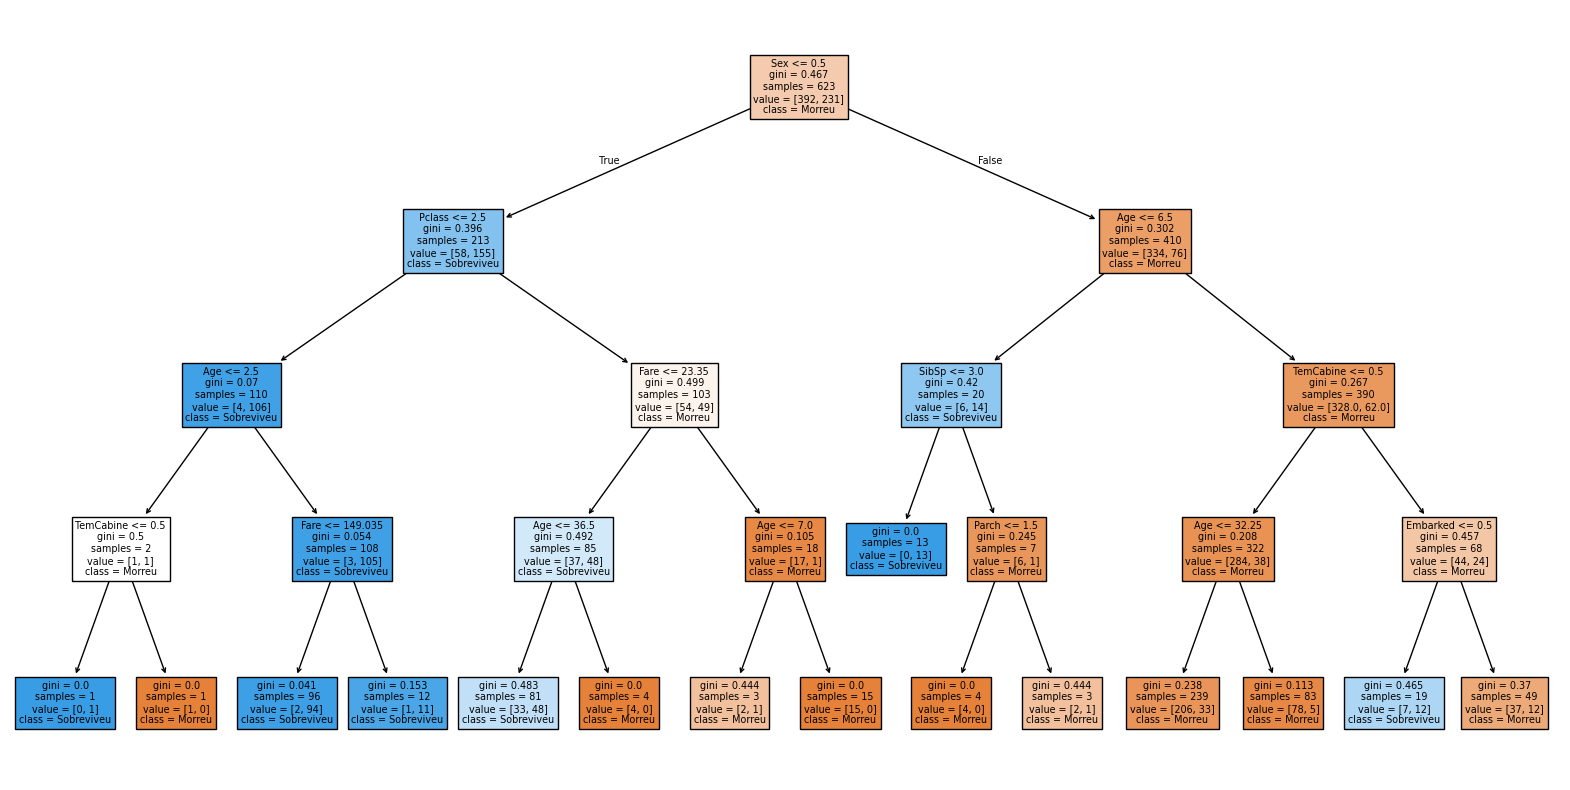

Acurácia: 0.7947761194029851
Matriz de confusão:
[[132  25]
 [ 30  81]]
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       157
           1       0.76      0.73      0.75       111

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268



In [1]:
import pandas as pd

df = pd.read_csv('Dados/train.csv')
print('Primeiras linhas:')
print(df.head())
print('\nInformações gerais:')
print(df.info())
print('\nEstatísticas dos atributos numéricos:')
print(df.describe())
print('\nDistribuição dos atributos categóricos:')
print('Sexo:')
print(df['Sex'].value_counts())
print('Embarque:')
print(df['Embarked'].value_counts())

df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['TemCabine'] = df['Cabin'].notnull().astype(int)

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'TemCabine']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = DecisionTreeClassifier(max_depth=4)
modelo.fit(X_train, y_train)

display('Árvore de decisão mostrando padrões de sobrevivência:')
plt.figure(figsize=(20,10))
plot_tree(modelo, feature_names=X.columns, class_names=['Morreu', 'Sobreviveu'], filled=True)
plt.show()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Acurácia:', accuracy_score(y_test, modelo.predict(X_test)))
print('Matriz de confusão:')
print(confusion_matrix(y_test, modelo.predict(X_test)))
print('Relatório de classificação:')
print(classification_report(y_test, modelo.predict(X_test)))